In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import time
from time import perf_counter

# (1)

<StemContainer object of 3 artists>

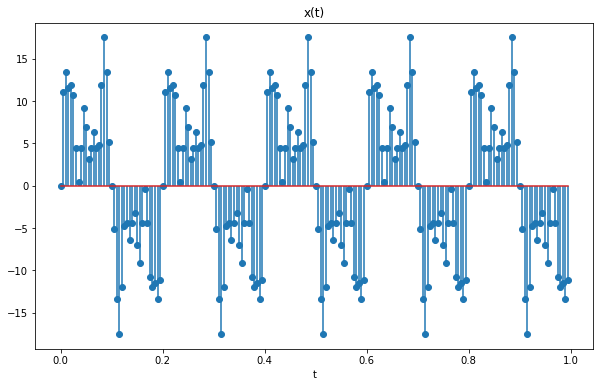

In [2]:
t=np.linspace(0,5,100)

fs=200
Ts=1/fs
n=np.arange(0,1/Ts)

x=9*np.sin(2*np.pi*5*n*Ts)+ 7*np.sin(2*np.pi*15*n*Ts)+ 5*np.sin(2*np.pi*25*n*Ts)+ 3*np.sin(2*np.pi*50*n*Ts)
plt.figure(figsize=(10,6))
plt.title('x(t)')
plt.xlabel('t')
plt.stem(n*Ts,x)


# (b)

In [3]:
def DFT(Xn,N):     #defining the DFT
    result=[]      
    for k in range (N):
        p=0
        for i in range(N):
            p=p+Xn[i]*np.exp((-2j*(np.pi)/N)*k*i)
        result.append(p)
    return result

<StemContainer object of 3 artists>

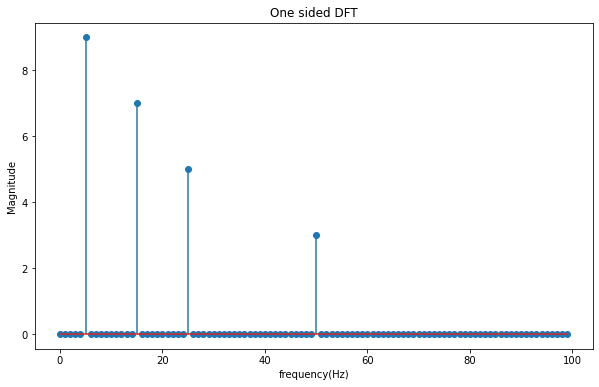

In [13]:
Dft_x=DFT(x,len(x))
n_1=int(len(Dft_x))/2
plt.figure(figsize=(10,6))
plt.title('One sided DFT')
plt.xlabel('frequency(Hz)')
plt.ylabel('Magnitude')
plt.stem(np.abs(Dft_x[:100])/n_1)

# (c)

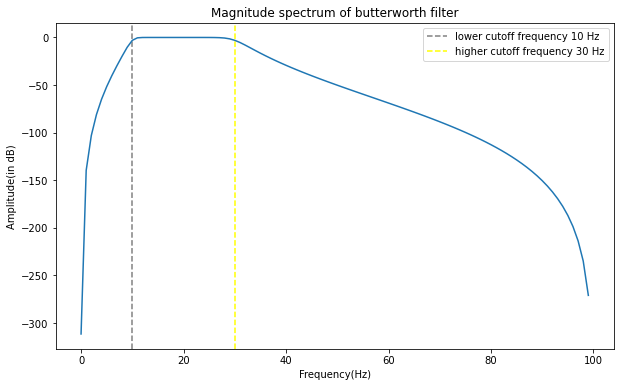

In [46]:
b,a=signal.butter(6,[10,30],btype='bandpass',analog=False,fs=200,output='ba')
w,h=signal.freqz(b,a,fs=200,worN=100)
plt.figure(figsize=(10,6))
plt.title('Magnitude spectrum of butterworth filter')
plt.axvline(x=10,ls='--',color='grey',label='lower cutoff frequency 10 Hz')
plt.axvline(x=30,ls='--',color='yellow',label='higher cutoff frequency 30 Hz')
plt.xticks=[0,10,20,30,40,50]
plt.plot(w,20*np.log10(abs(h)))
plt.xlabel('Frequency(Hz)')
plt.ylabel('Amplitude(in dB)')
plt.legend()

# (d)

<StemContainer object of 3 artists>

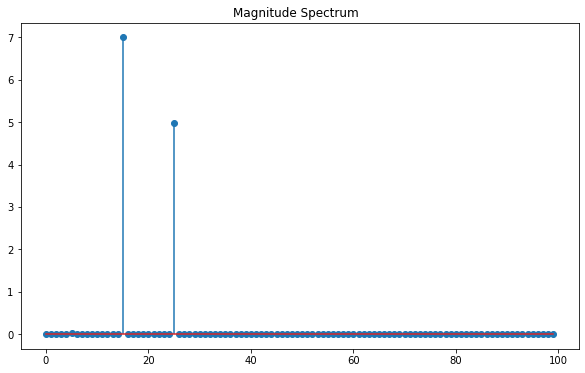

In [47]:
Dft_x1=np.reshape(Dft_x,(200,1))
Dft_x1=Dft_x[:100]
Fil=np.multiply(Dft_x1,h)
plt.figure(figsize=(10,6))
plt.title('Magnitude Spectrum  ')
plt.stem(np.abs(Fil)/n_1)

# (e)

In [7]:
def IDFT(Xn,N):     #defining the IDFT
    result=[]      
    for i in range (N):
        p=0
        for k in range(N):
            p=p+(1/N)*Xn[k]*np.exp((2j*(np.pi)/N)*k*i)
        result.append(p)
    return result

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

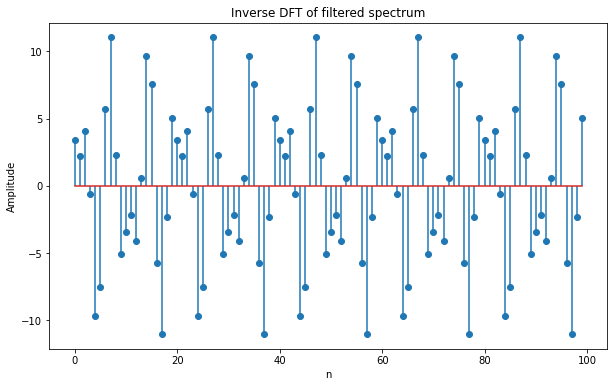

In [48]:
Idft_fil=IDFT(Fil,len(Fil))
plt.figure(figsize=(10,6))
plt.title('Inverse DFT of filtered spectrum')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.stem(Idft_fil)

# (2)

# (a)

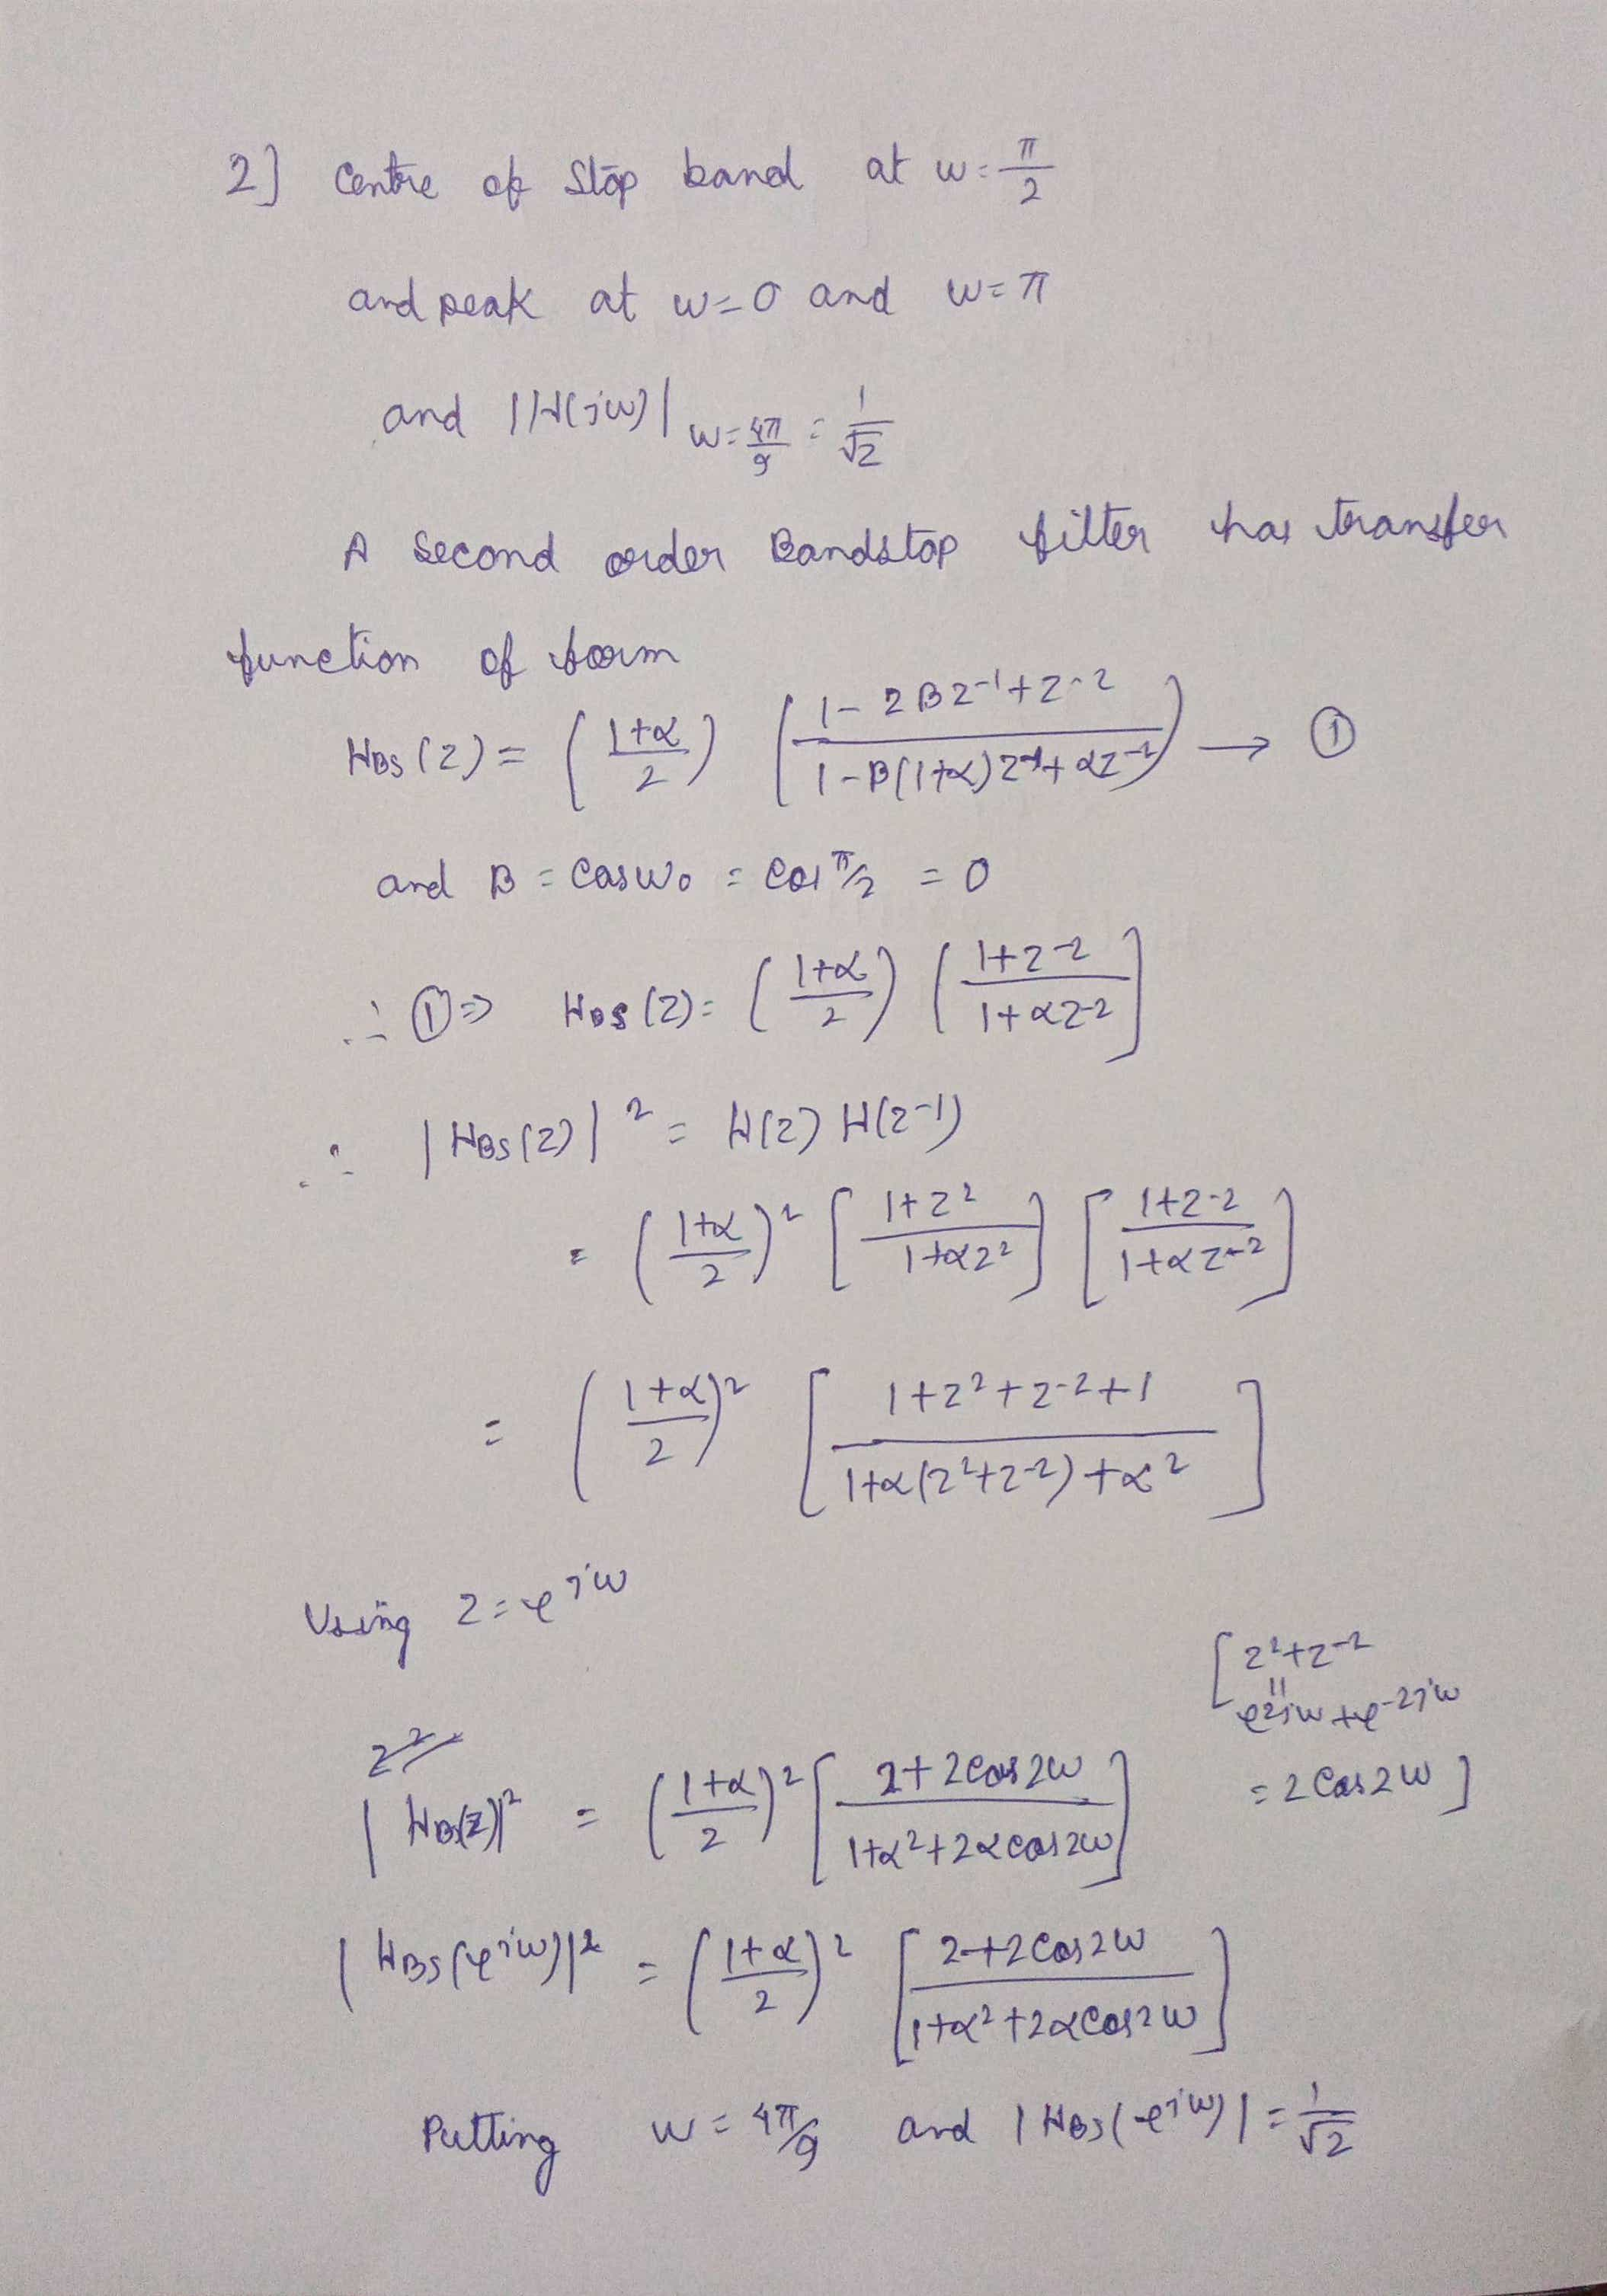

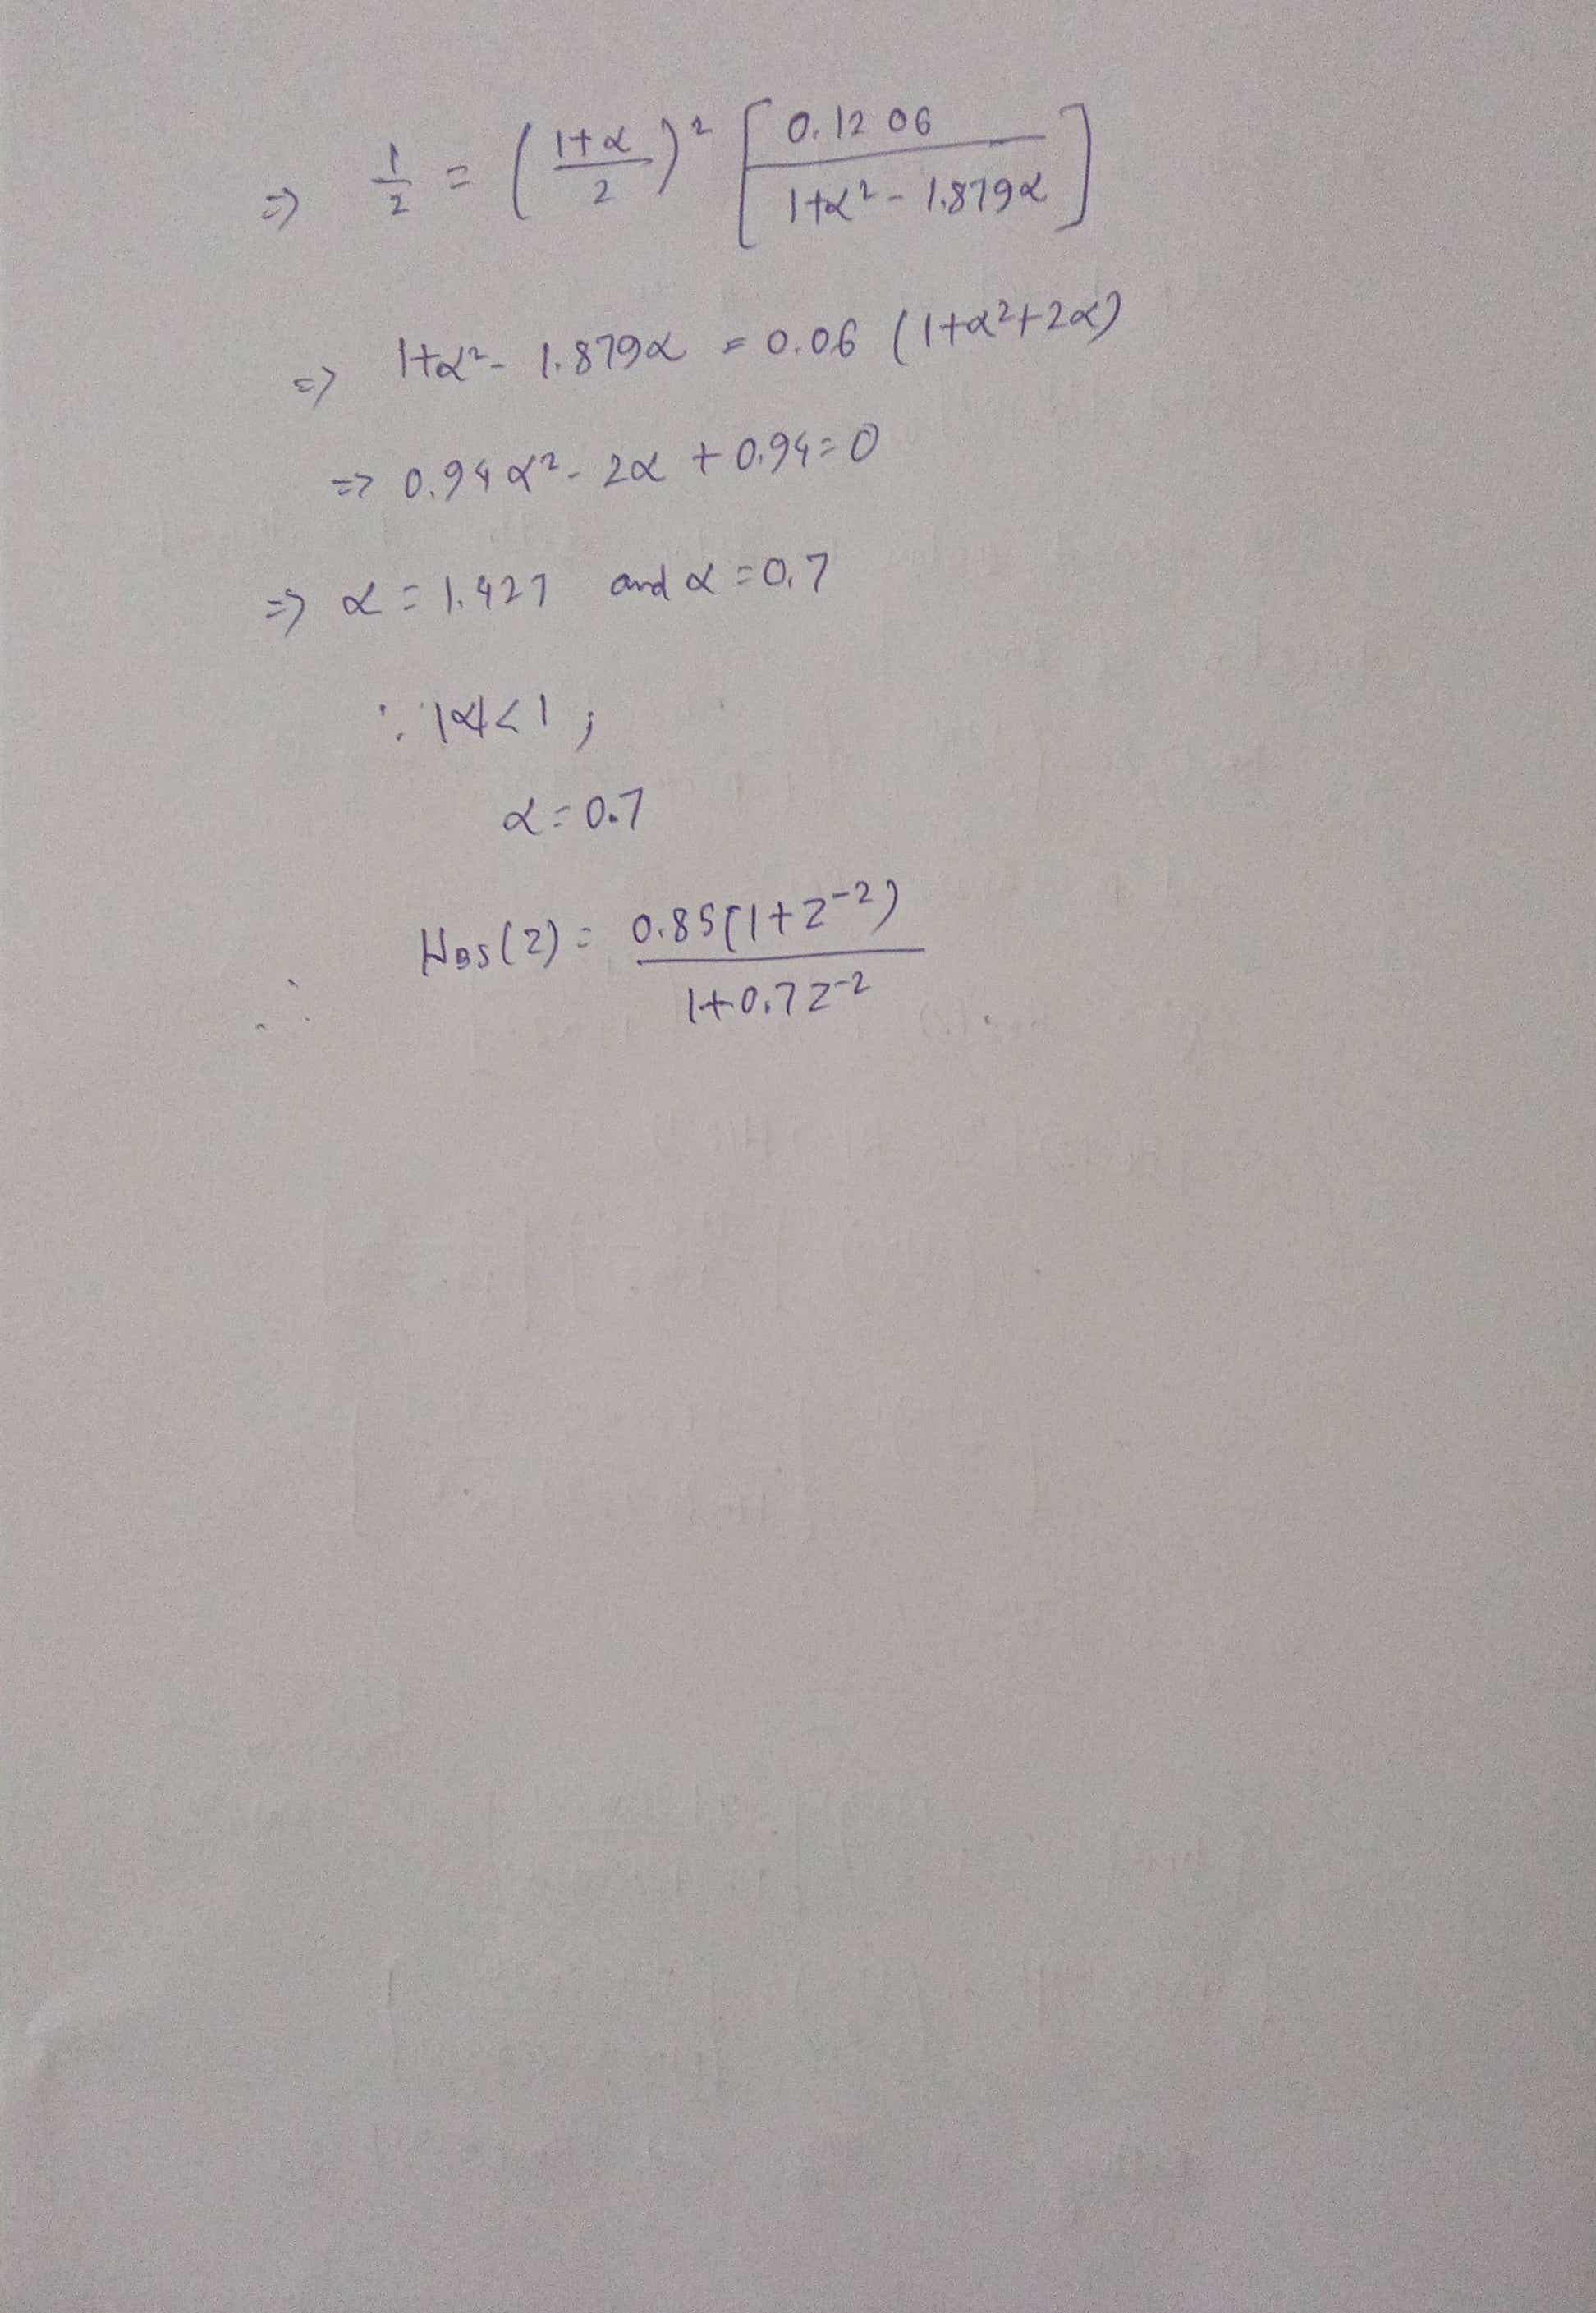

In [19]:
b_1=[0.85,0,0.85]
a_1=[1,0,0.7]
w,h=signal.freqz(b_1,a_1,worN=100)

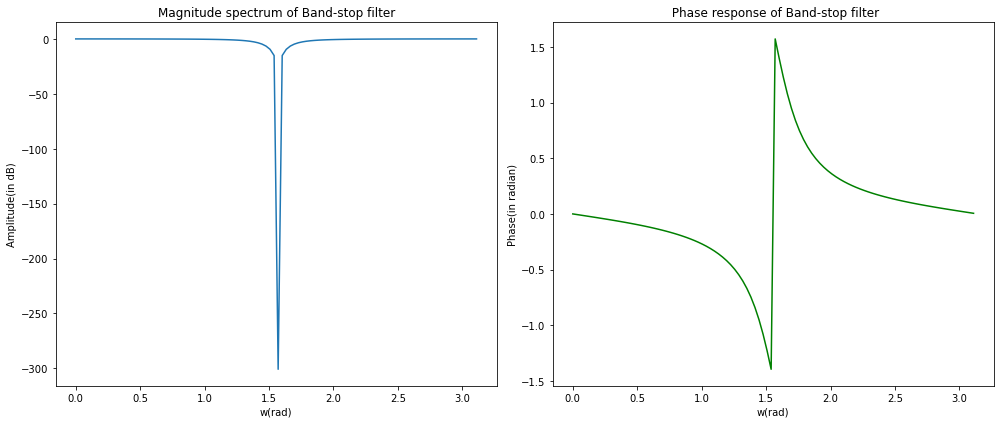

In [20]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.title('Magnitude spectrum of Band-stop filter')
plt.plot(w,20*np.log10(abs(h)))
plt.xlabel('w(rad)')
plt.ylabel('Amplitude(in dB)')

plt.subplot(1,2,2)
plt.title(' Phase response of Band-stop filter')
plt.xlabel('w(rad)')
plt.ylabel('Phase(in radian)')
plt.plot(w,np.angle(h),'g')
plt.tight_layout()


# (b)

<StemContainer object of 3 artists>

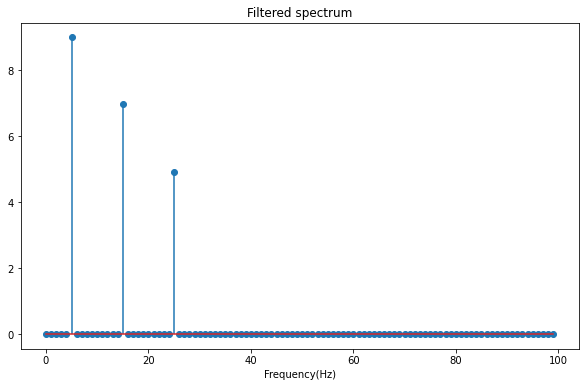

In [21]:
Dft_x1=Dft_x[:100]
Fil_spec=np.multiply(Dft_x1,h)
plt.figure(figsize=(10,6))
plt.title('Filtered spectrum')
plt.xlabel('Frequency(Hz)')
plt.stem(np.abs(Fil_spec)/n_1)

# (c)

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<StemContainer object of 3 artists>

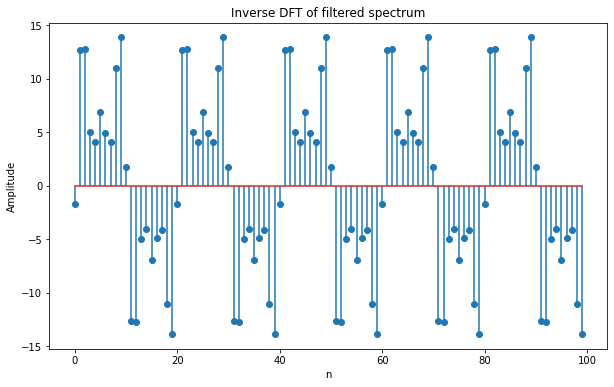

In [22]:
Idft_fil1=IDFT(Fil_spec,len(Fil_spec))
plt.figure(figsize=(10,6))
plt.title('Inverse DFT of filtered spectrum')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.stem(Idft_fil1)

# (3)

# (a)

pole locations:
 [-0.4+0.58309519j -0.4-0.58309519j  0.4+0.j        ]
zero locations:
 [ 2.5+0.j         -0.8+1.16619038j -0.8-1.16619038j]


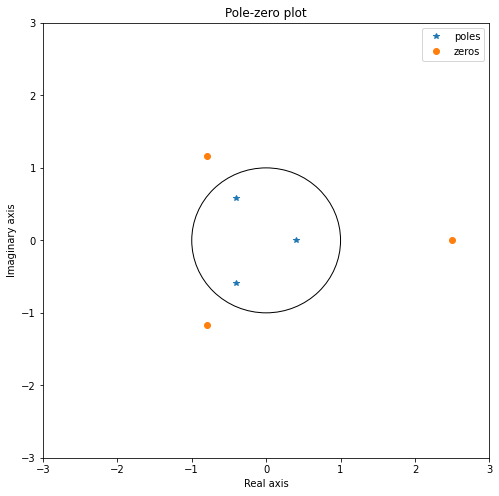

In [39]:
H_z=(-0.2+0.18*np.exp(-1j*w)+0.4*np.exp(1j*(-2)*w)+np.exp(1j*(-3)*w))/(1+(0.4*np.exp(-1j*w))+(0.18*np.exp(1j*(-2)*w))-
                                                                     (0.2*np.exp(1j*(-3)*w)))
num=[-0.2,0.18,0.4,1]
den=[1,0.4,0.18,-0.2]
z,p,k=signal.tf2zpk(num,den)
circle=plt.Circle((0,0),1,fill=False)

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Pole-zero plot')
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.plot(p.real,p.imag,'*',label='poles')
plt.plot(z.real,z.imag,'o',label='zeros')
ax.add_patch(circle)
plt.legend()

print('pole locations:\n',p)
print('zero locations:\n',z)

It is an All Pass Filter.Here, zeros locations are reciprocals of conjugate of pole locations z=(1/p*)

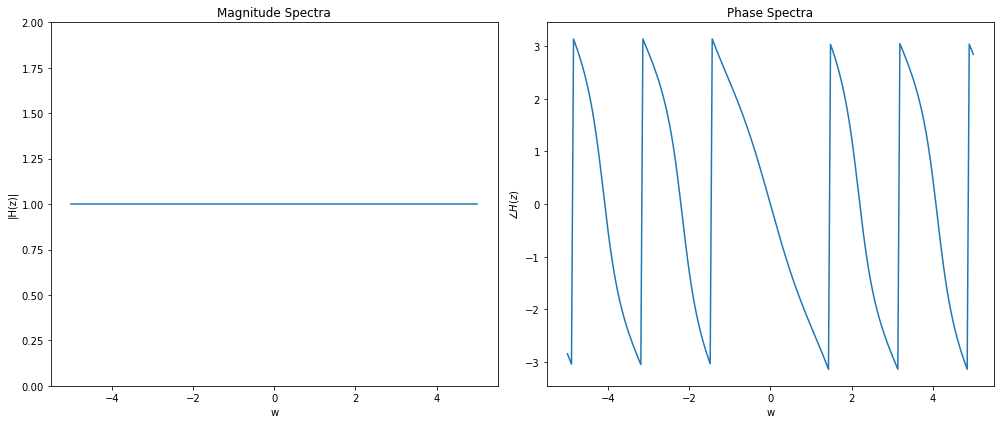

In [38]:
w=np.linspace(-5,5,200)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.ylim(0,2)
plt.title('Magnitude Spectra')
plt.xlabel('w')
plt.ylabel('|H(z)|')
plt.plot(w,np.abs(H_z))

plt.subplot(1,2,2)
plt.title('Phase Spectra')
plt.xlabel('w')
plt.ylabel(r'$\angle H(z)$')
plt.plot(w,np.angle(H_z))
plt.tight_layout()


# (4)

# (a)

In [46]:
b,a=signal.cheby1(3,rp=1,Wn=2000,btype='high',output='ba',fs=8000)  #Calculate the nominator and denominator coefficients
w,h=signal.freqz(b,a,fs=8000,worN=512)                              #Calculate frequency response of the filter
print('numerator coefficients are: \n',b)
print('denominator coefficients are:\n',a)

numerator coefficients are: 
 [ 0.13214071 -0.39642212  0.39642212 -0.13214071]
denominator coefficients are:
 [1.         0.34319322 0.60439354 0.20407467]


In [ ]:
#Transfer Function Tz=(0.1321-0.3964z^-1+0.3964z^-2-0.1321z^-3)/(1+0.3432z^-1+0.6044z^-2+0.2041z^-3)
#Difference Equation
#y(n)=0.1321x(n)-0.3964x(n-1)+0.3964x(n-2)-0.1321x(n-3)-0.3432y(n-1)-0.6044y(n-2)-0.2041y(n-3)

# (b)

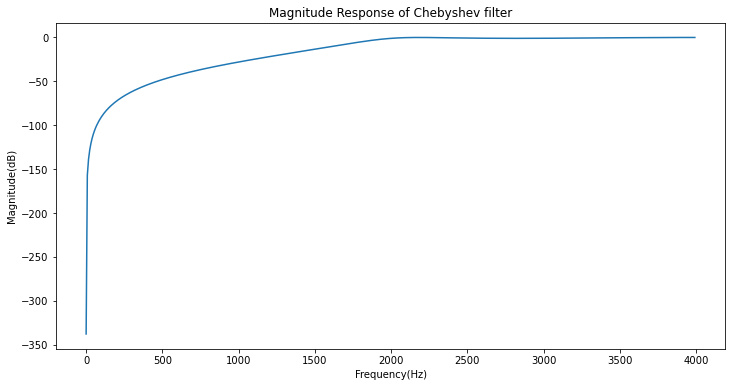

In [44]:
plt.figure(figsize=(12,6))
plt.title('Magnitude Response of Chebyshev filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude(dB)')
plt.plot(w,20*np.log10(abs(h)))


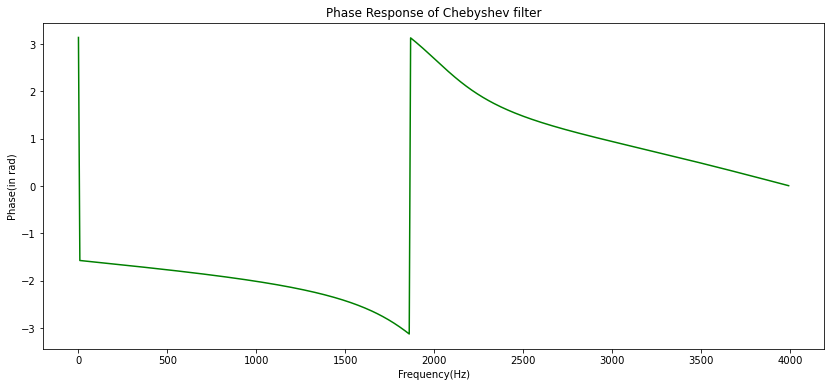

In [55]:
plt.figure(figsize=(14,6))
plt.title('Phase Response of Chebyshev filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Phase(in rad)')
plt.plot(w,np.angle(h),'g')

# (c)

pole locations:
 [-0.002329  +0.77640918j -0.002329  -0.77640918j -0.33853523+0.j        ]
zero locations:
 [0.99999997+0.00027509j 0.99999997-0.00027509j 0.99999998+0.j        ]


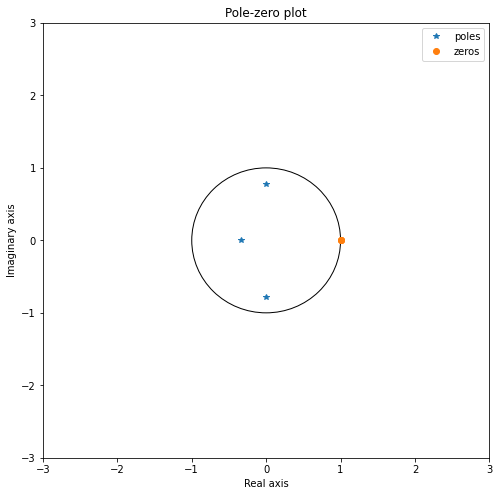

In [40]:
num_1=[ 0.13214071,-0.39642212,0.39642212,-0.13214071]
den_1=[1, 0.34319322,0.60439354,0.20407467]
z,p,k=signal.tf2zpk(num_1,den_1)
circle=plt.Circle((0,0),1,fill=False)

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Pole-zero plot')
plt.xlabel('Real axis')
plt.ylabel('Imaginary axis')
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.plot(p.real,p.imag,'*',label='poles')
plt.plot(z.real,z.imag,'o',label='zeros')
ax.add_patch(circle)
plt.legend()

print('pole locations:\n',p)
print('zero locations:\n',z)

# (5)

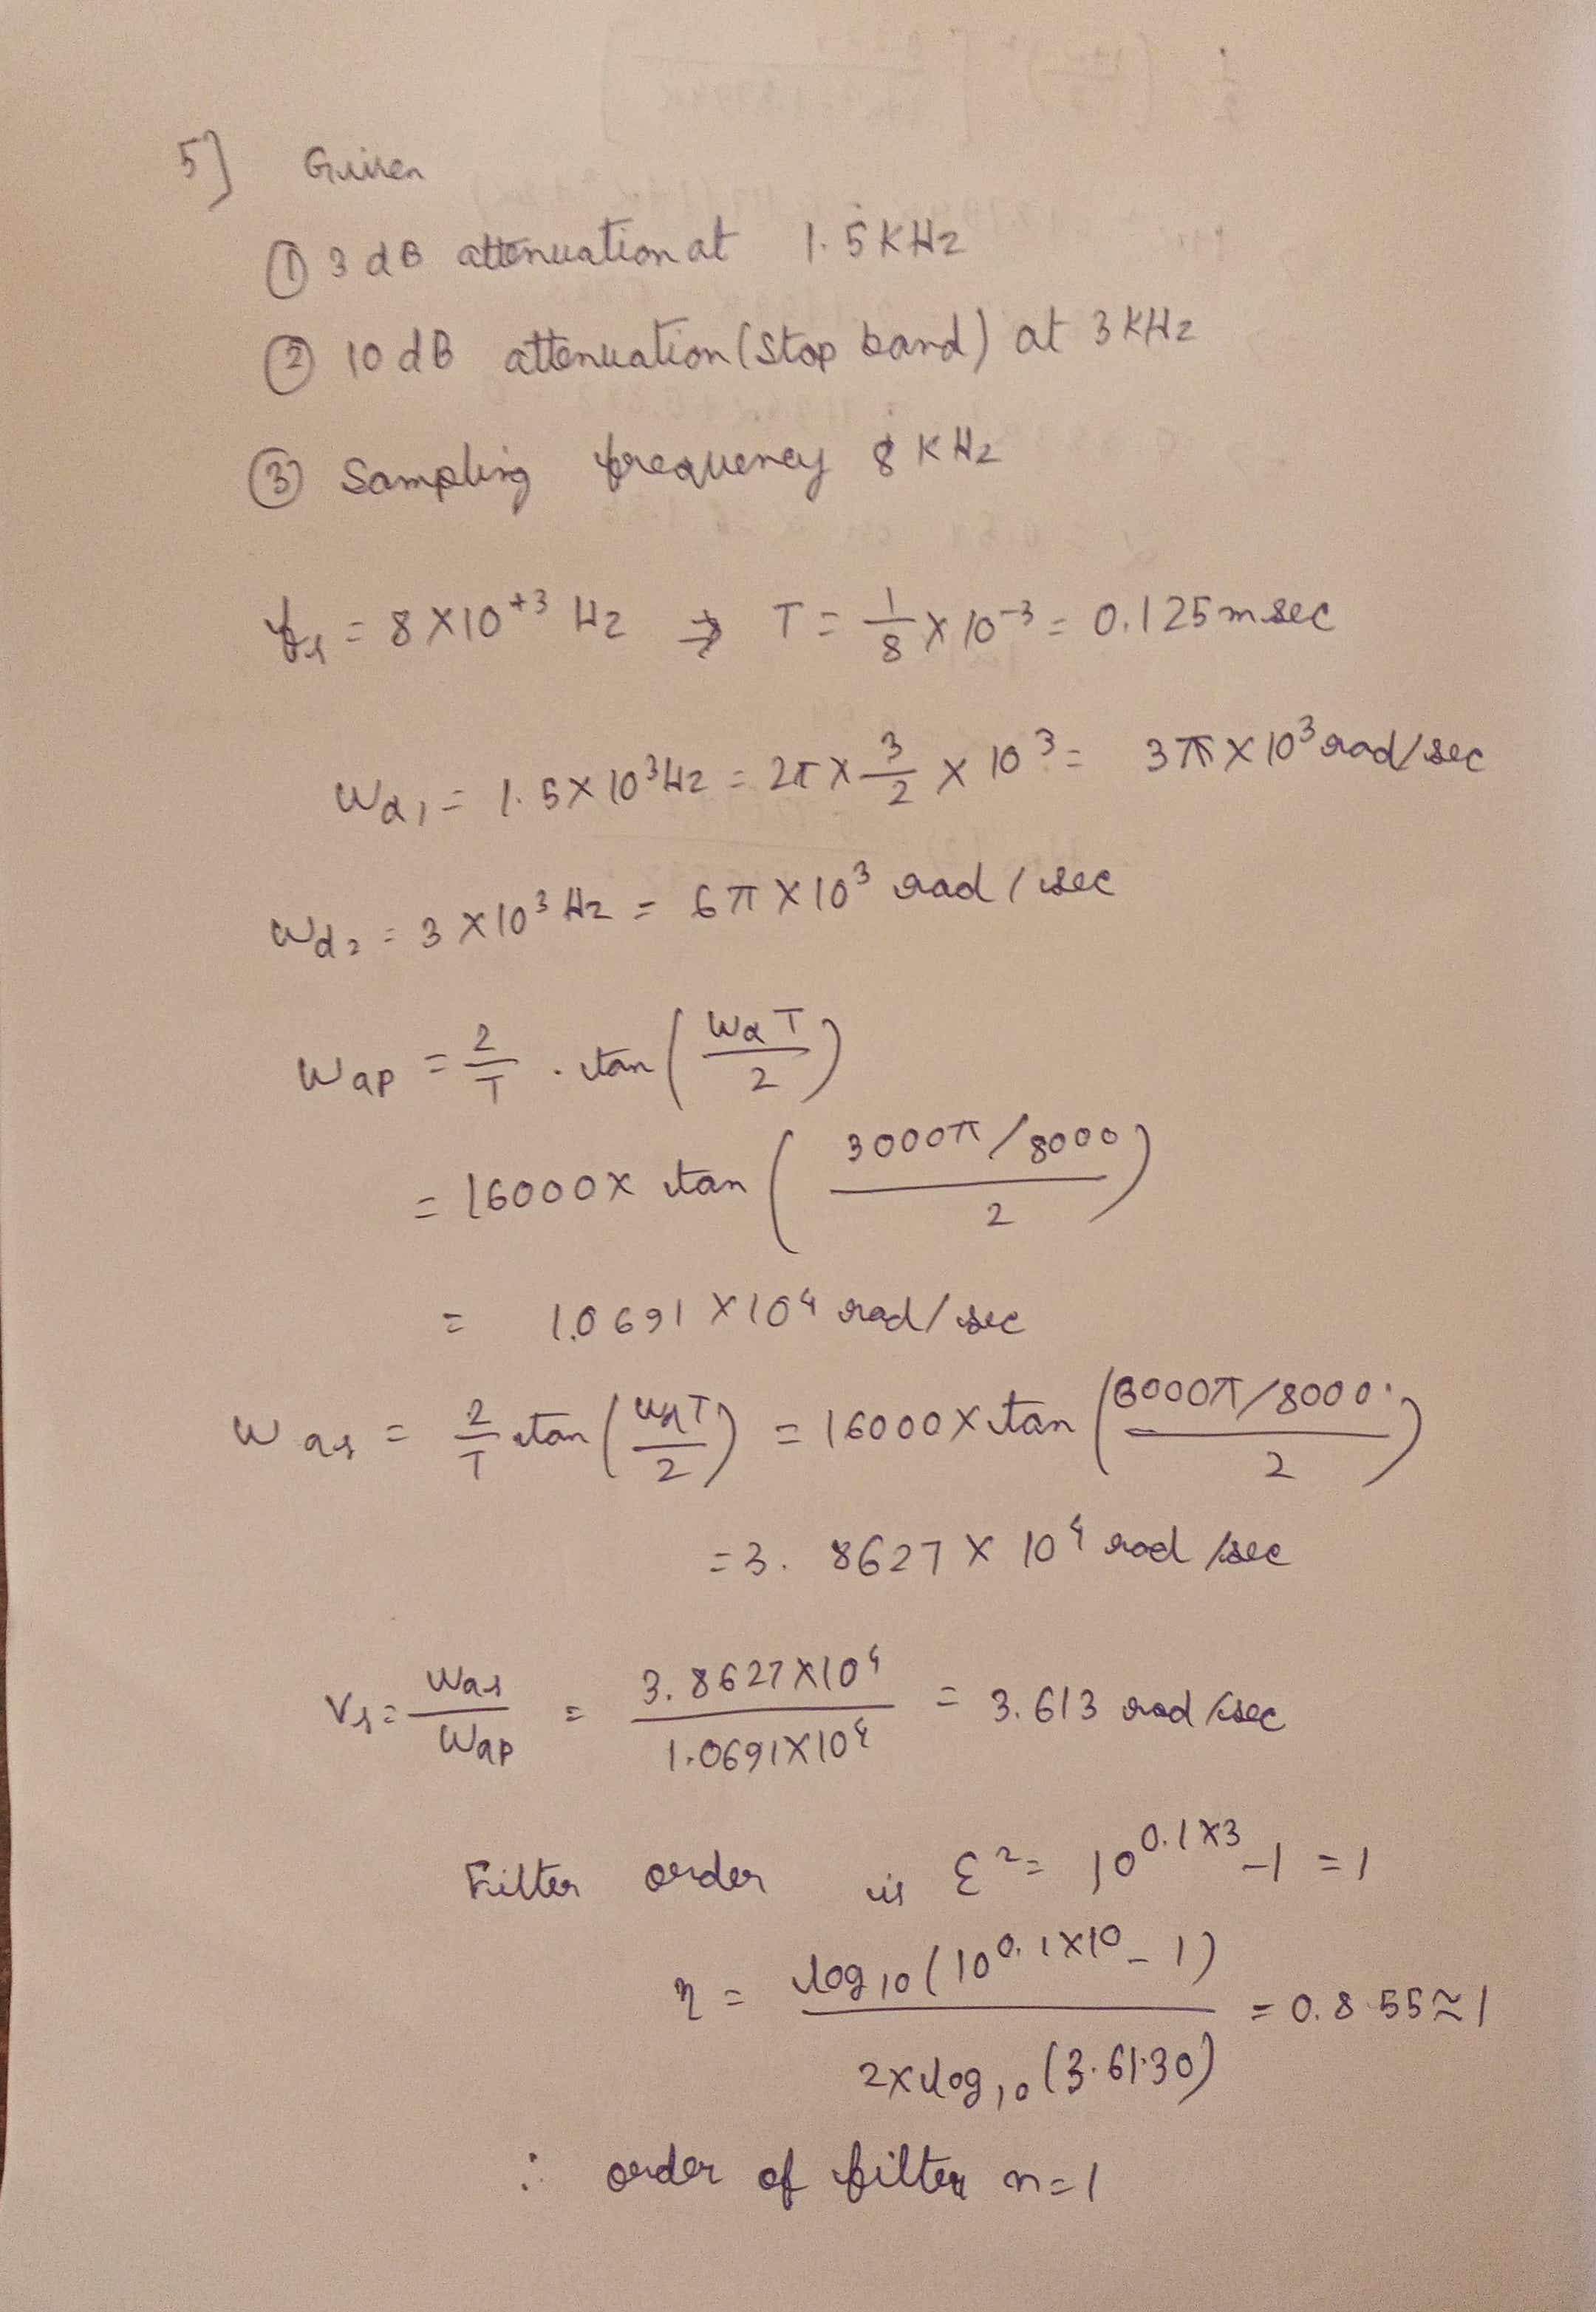

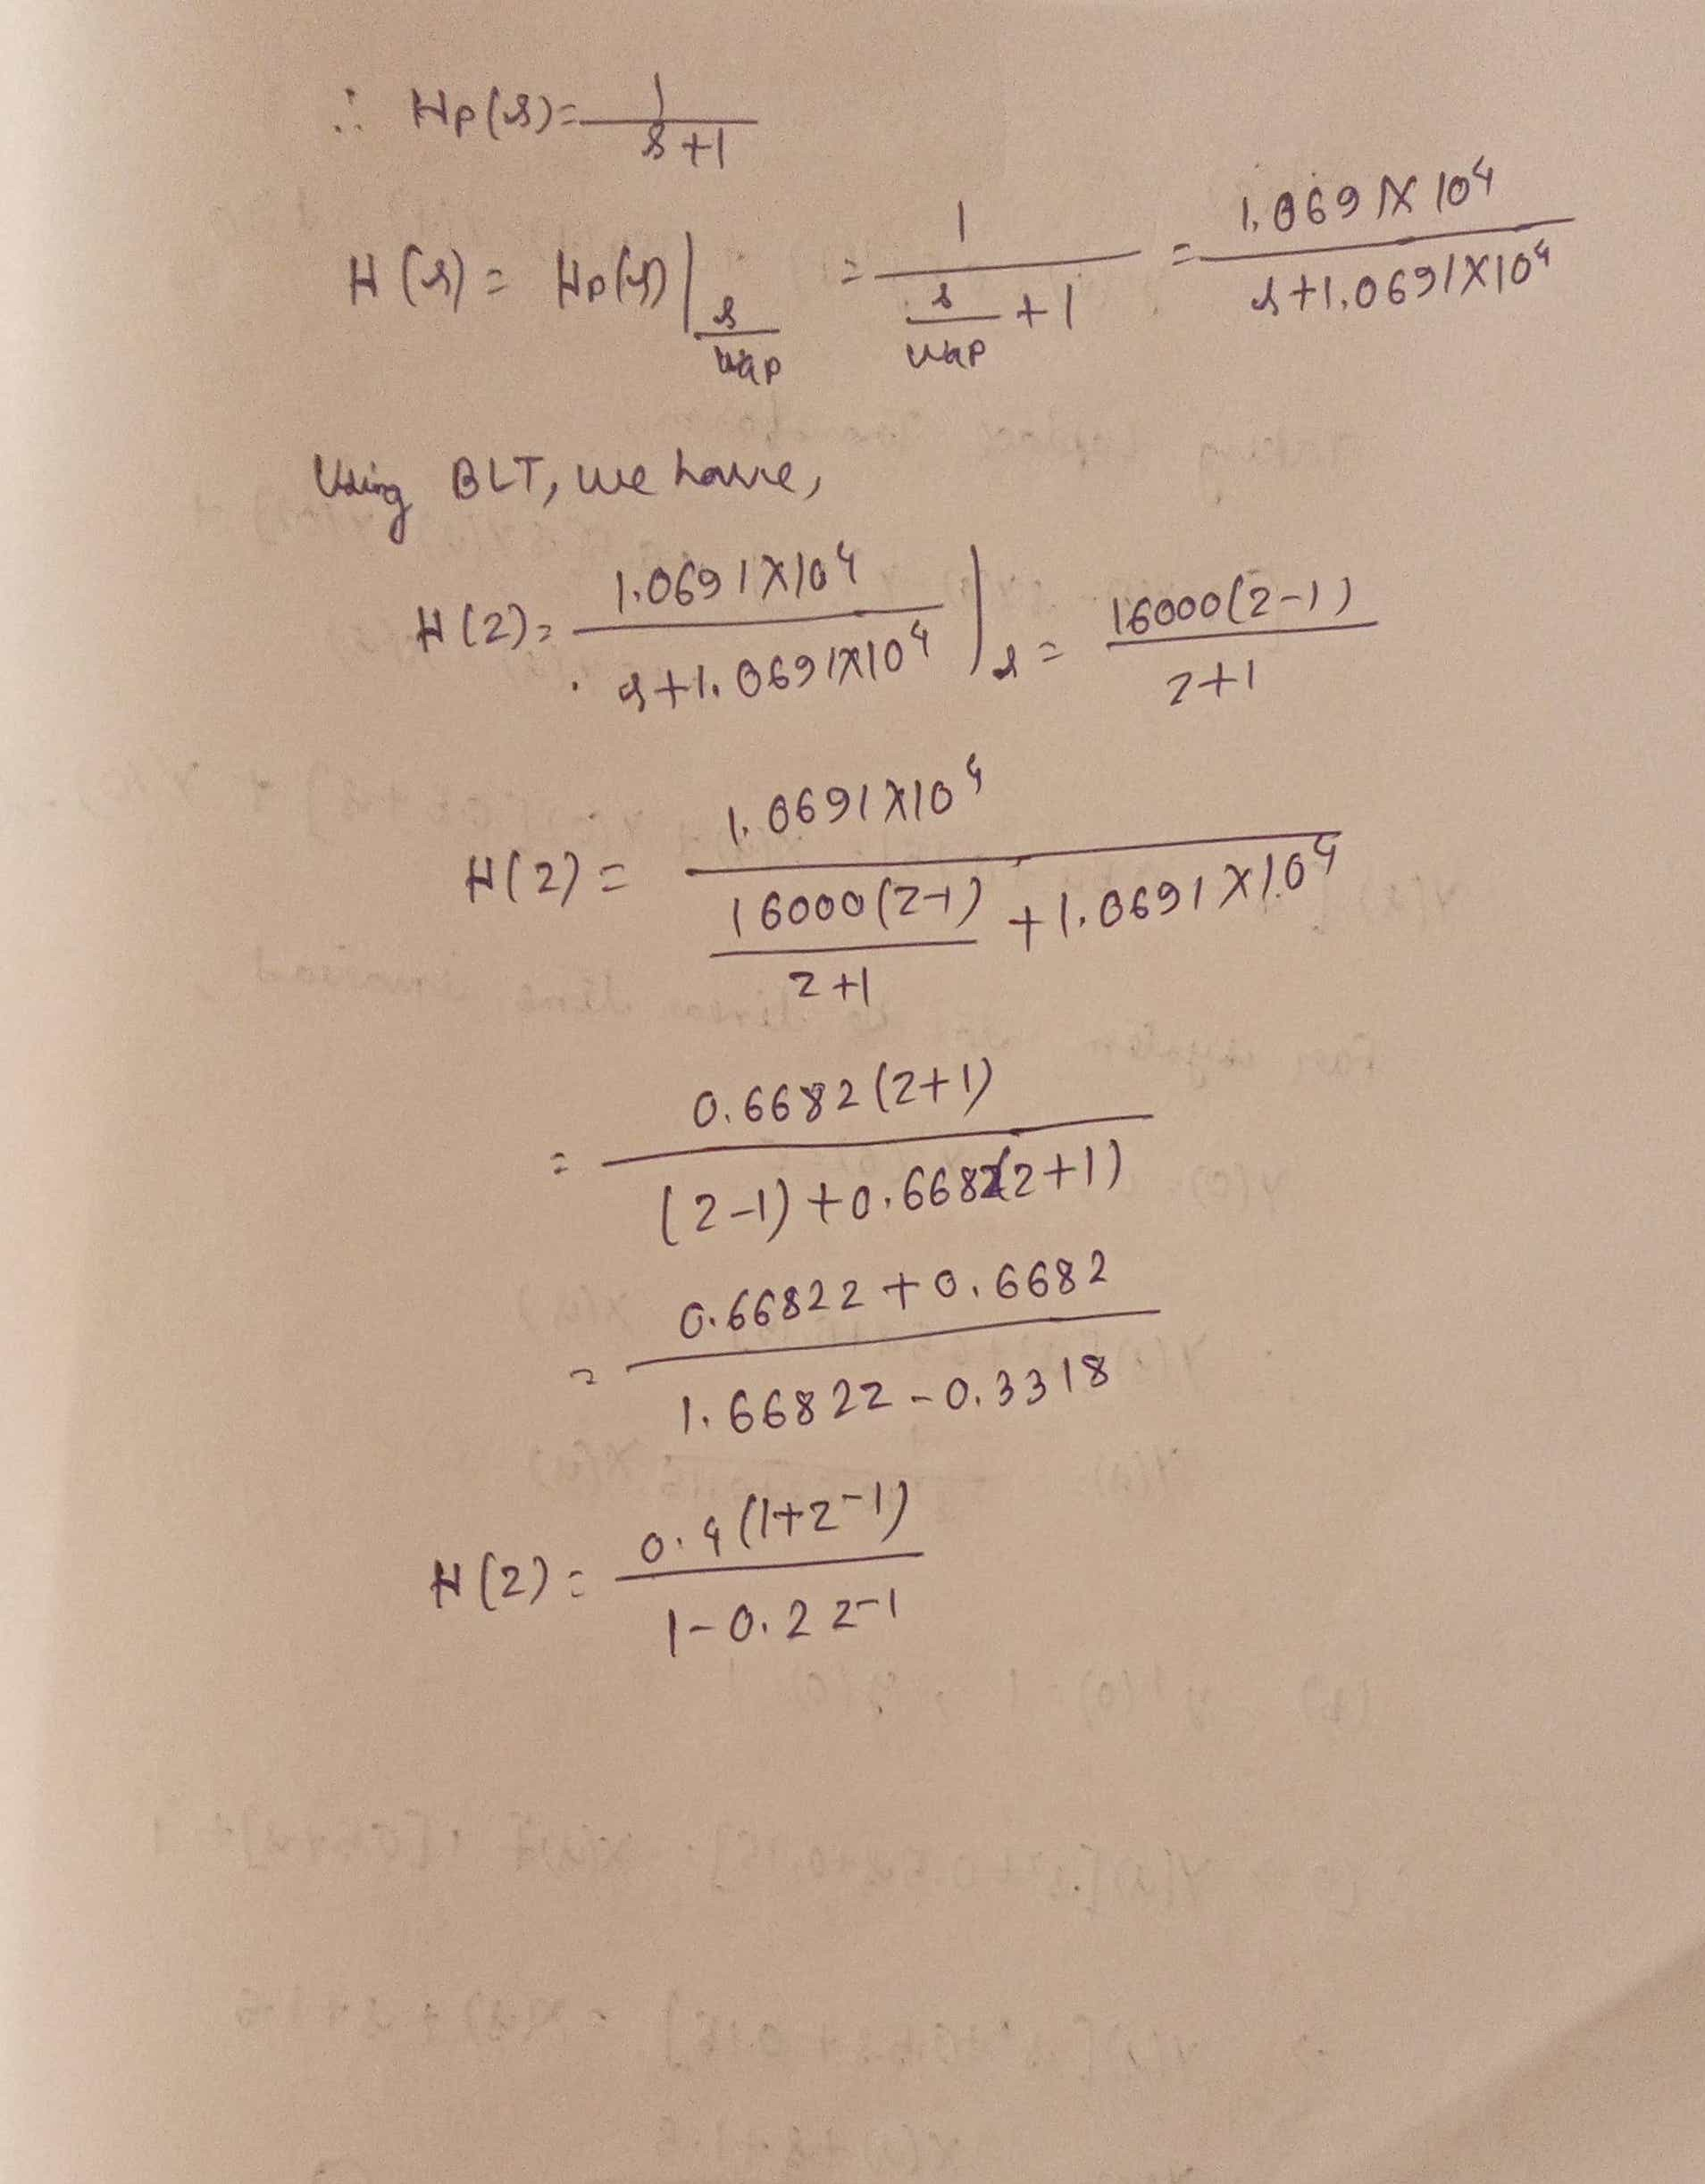

Order and cutoff frequencies are:1 and 1502.794405627777 Hz respectively


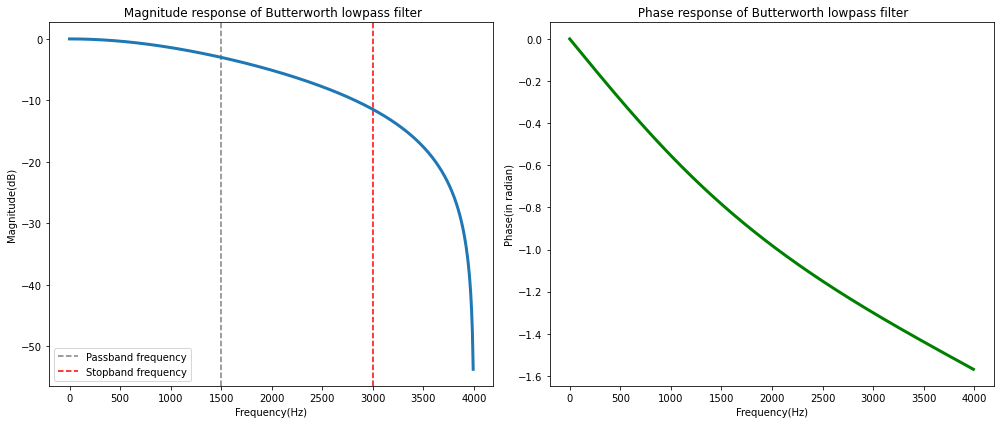

In [145]:
N,wn=signal.buttord(1500,3000,3,10,analog=False,fs=8000)
b,a=signal.butter(N,wn,btype='low',analog=False,fs=8000)
w,h=signal.freqz(b,a,fs=8000,worN=512)
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title(' Magnitude response of Butterworth lowpass filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Magnitude(dB)')
plt.axvline(1500,color='grey',ls='--',label='Passband frequency')
plt.axvline(3000,color='r',ls='--',label='Stopband frequency')
plt.plot(w,20*np.log10(abs(h)),lw=3)
plt.legend()


plt.subplot(1,2,2)
plt.title(' Phase response of Butterworth lowpass filter')
plt.xlabel('Frequency(Hz)')
plt.ylabel('Phase(in radian)')
plt.plot(w,np.angle(h),'g',lw=3)
plt.tight_layout()

print('Order and cutoff frequencies are:{} and {} Hz respectively'.format(N,wn))

# (6)

# (a)

In [23]:
rng = np.random.default_rng(12345)
def random(N):
    return rng.random(size=N)

rand=random(1024)

In [24]:
def Disc_FT(x):      #Defining  the DFT

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

In [25]:
def DFT_time(N):         #Time for DFT using written function
    t_start=perf_counter()
    Dft_r=Disc_FT(random(N))
    t_end=perf_counter()
    t_total=t_end-t_start
    return t_total

In [26]:
print('Time required for DFT:{} seconds'.format(DFT_time(1024)))

Time required for DFT:0.23124929999994492 seconds


# (b)

In [28]:
def FFT_time(N):             #Time for DFT using in-built function np.fft 
    t_start=perf_counter()
    np.fft.fft(random(N),N)
    t_end=perf_counter()
    t_total=t_end-t_start
    return t_total

In [29]:
print('Time required for FFT:{} seconds'.format(FFT_time(1024)))

Time required for FFT:0.0014681000000109634 seconds


# (c)

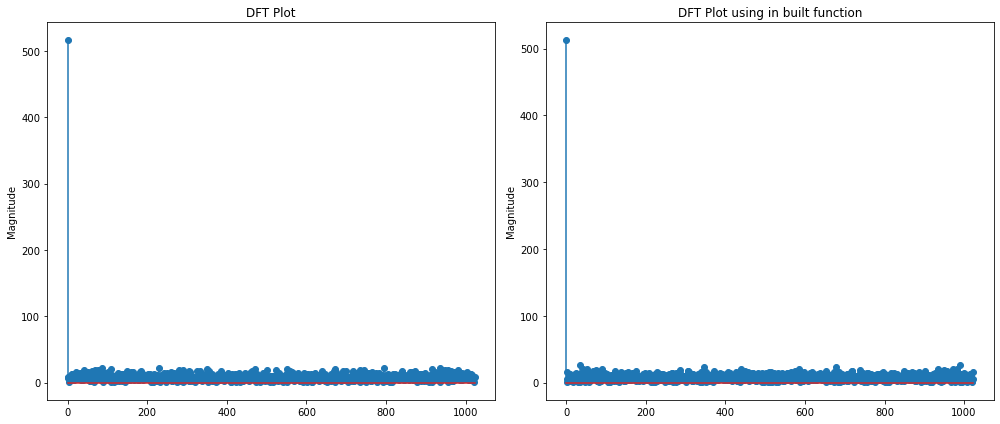

In [42]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('DFT Plot')
plt.ylabel('Magnitude')
plt.stem(np.abs(Disc_FT(random(1024))))

plt.subplot(1,2,2)
plt.title('DFT Plot using in built function')
plt.ylabel('Magnitude')
plt.stem(np.abs(np.fft.fft(random(1024))))
plt.tight_layout()

Both DFT plots are similar .While time taken by the code to run DFT function is more compared to using np.fft method.With increase in number of samples,DFT using function will take more time to run compared to DFT computed using np.fft method.

# (d)

In [32]:
Dft_time=[0,0,0,0,0,0,0,0,0,0,0,0] #Create a list to store DFT time required for varying samples
for i in range(12):
    Dft_time[i]=DFT_time(2**i)
    
Fft_time=[0,0,0,0,0,0,0,0,0,0,0,0]   #Create a list to store DFT time required using np.fft for varying samples
for i in range(12):
    Fft_time[i]=FFT_time(2**i)


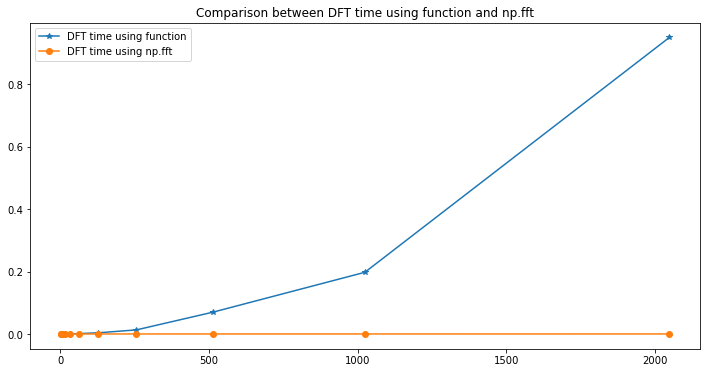

In [35]:
N_1=[]
for i in range(12):
    N_1.append(2**i)
plt.figure(figsize=(12,6))
plt.plot(N_1,Dft_time,marker='*',label='DFT time using function')
plt.plot(N_1,Fft_time,marker='o',label='DFT time using np.fft')
plt.title('Comparison between DFT time using function and np.fft')
plt.legend()

From the graph,it is clear that with increase in number of samples,in-built function np.fft takes less time compared to the function written to compute DFT.

# (7)

Time required to run the code: 0.004566999999951804 seconds
Input sequence: 
 [(1+0j), (1+0j), (1+0j), (1+0j), 0j, 0j, 0j, 0j]
DFT Sequence: 
 [(4+0j), (0.9999999999999999-2.414213562373096j), 0j, (1-0.41421356237309515j), 0j, (1+0.41421356237309515j), 0j, (0.9999999999999999+2.414213562373096j)]


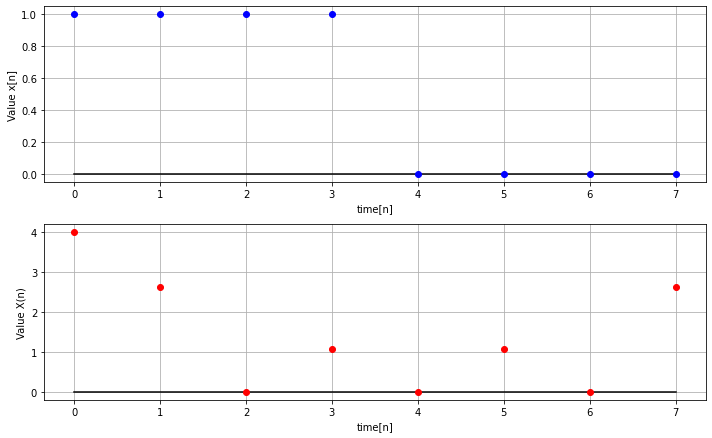

In [43]:
start=perf_counter()
disc = [0, 1, 2, 3, 4, 5, 6, 7]

# Input Values

x0 = [complex(1, 0),
      complex(1, 0),
      complex(1, 0),
      complex(1, 0),
      complex(0, 0),
      complex(0, 0),
      complex(0, 0),
      complex(0, 0)]

# Default Zero Initialization


x = [complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0)]

x1 = x.copy()
x2 = x.copy()
x3 = x.copy()

#  Finding out the twiddle Factor


w = np.exp(-complex(0, 1) * 2 * np.pi / 8)
w0 = w ** 0
w1 = w
w2 = w * w
w3 = w1 * w2


x1[0] = x0[0] + x0[4]
x1[1] = x0[0] - x0[4]

x1[2] = x0[2] + x0[6]
x1[3] = x0[2] - x0[6]

x1[4] = x0[1] + x0[5]
x1[5] = x0[1] - x0[5]

x1[6] = x0[3] + x0[7]
x1[7] = x0[3] - x0[7]


#  Stage 2


x2[0] = x1[0] + w0 * x1[2]
x2[1] = x1[1] + w2 * x1[3]
x2[2] = x1[0] - w0 * x1[2]
x2[3] = x1[1] - w2 * x1[3]

x2[4] = x1[4] + w0 * x1[6]
x2[5] = x1[5] + w2 * x1[7]
x2[6] = x1[4] - w0 * x1[6]
x2[7] = x1[5] - w2 * x1[7]

#Stage 3

x3[0] = x2[0] + w0 * x2[4]
x3[1] = x2[1] + w1 * x2[5]
x3[2] = x2[2] + w2 * x2[6]
x3[3] = x2[3] + w3 * x2[7]
x3[4] = x2[0] - w0 * x2[4]
x3[5] = x2[1] - w1 * x2[5]
x3[6] = x2[2] - w2 * x2[6]
x3[7] = x2[3] - w3 * x2[7]

end=perf_counter()
t_total=end-start
#  Printing out the result
print('Time required to run the code: {} seconds'.format(t_total))
print('Input sequence: \n',x0)
print('DFT Sequence: \n',x3)

plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(disc, [0, 0, 0, 0, 0, 0, 0, 0], color='black')  # Just for Reference
plt.plot(disc, np.abs(x0), 'bo')
plt.tight_layout()
plt.xlabel('time[n]')
plt.ylabel('Value x[n]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(disc, [0, 0, 0, 0, 0, 0, 0, 0], color='black')  # Just for Reference
plt.plot(disc, np.abs(x3), 'ro')
plt.tight_layout()
plt.xlabel('time[n]')
plt.ylabel('Value X(n)')
plt.grid()
plt.show()

# (8)

Time required to run the code: 0.003934399999934612 seconds
Input sequence: 
 [(1+0j), (1+0j), (1+0j), (1+0j), 0j, 0j, 0j, 0j]
DFT Sequence: 
 [(3-1.0000000000000002j), (-1.2928932188134523+1.707106781186548j), (1.0000000000000004-1.0000000000000002j), (-1.0000000000000004+1.0000000000000002j), (-3+1.0000000000000002j), (1.2928932188134523-1.707106781186548j), (-1.0000000000000004+1.0000000000000002j), (1.0000000000000004-1.0000000000000002j)]


C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


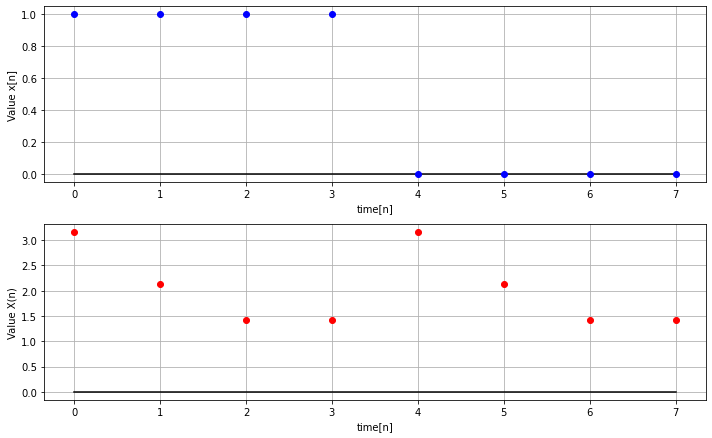

In [44]:

import matplotlib.pyplot as plt

start=perf_counter()
disc = [0, 1, 2, 3, 4, 5, 6, 7]

# Input Values

x0 = [complex(1, 0),
      complex(1, 0),
      complex(1, 0),
      complex(1, 0),
      complex(0, 0),
      complex(0, 0),
      complex(0, 0),
      complex(0, 0)]

# Default Zero Initialization


x = [complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0),
     complex(0, 0)]

x1 = x.copy()
x2 = x.copy()
x3 = x.copy()

#  Finding out the twiddle Factor


w = np.exp(-complex(0, 1) * 2 * np.pi / 8)
w0 = w ** 0
w1 = w
w2 = w * w
w3 = w1 * w2


x1[0] = x0[0] + (x0[0]+x0[4])*x0[4]
x1[1] = x0[1] + (x0[1]+x0[5])*x0[5]

x1[2] = x0[2] +(x0[2]+x0[6])*x0[6]
x1[3] = x0[3] + (x0[3]+x0[7])*x0[7]

x1[4] = x0[4] +(x0[4]-x0[0])*x0[0]
x1[5] = x0[5] +(x0[5]-x0[1])*x0[1]

x1[6] = x0[6] +(x0[6]-x0[2])*x0[2]
x1[7] = x0[7] +(x0[7]-x0[3])*x0[3]


#  Stage 2


x2[0] = x1[0] + w0 * x1[2]
x2[1] = x1[1] + w2 * x1[3]
x2[2] = x1[2] - w0 * x1[0]
x2[3] = x1[3] - w2 * x1[1]

x2[4] = x1[4] + w2 * x1[6]
x2[5] = x1[5] + w3 * x1[7]
x2[6] = x1[6] - w0 * x1[4]
x2[7] = x1[7] - w2 * x1[5]

#Stage 3

x3[0] = x2[0] + w0 * x2[1]
x3[1] = x2[4] + w0 * x2[5]
x3[2] = x2[2] + w2 * x2[3]
x3[3] = x2[6] + w2 * x2[7]
x3[4] = -x2[1] - w0 * x2[0]
x3[5] = -x2[5] - w0 * x2[4]
x3[6] = -x2[2] - w2 * x2[3]
x3[7] = -x2[6] - w2 * x2[7]

end=perf_counter()
t_total=end-start
#  Printing out the result
print('Time required to run the code: {} seconds'.format(t_total))
print('Input sequence: \n',x0)
print('DFT Sequence: \n',x3)

plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(disc, [0, 0, 0, 0, 0, 0, 0, 0], color='black')  # Just for Reference
plt.plot(disc, x0, 'bo')
plt.tight_layout()
plt.xlabel('time[n]')
plt.ylabel('Value x[n]')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(disc, [0, 0, 0, 0, 0, 0, 0, 0], color='black')  # Just for Reference
plt.plot(disc, np.abs(x3), 'ro')
plt.tight_layout()
plt.xlabel('time[n]')
plt.ylabel('Value X(n)')
plt.grid()
plt.show()

# (9)

# (a)

In [74]:
x=[1,2,3,1]
h=[1,1,1]

N=len(x)+len(h)-1

def Linear_Convolve(A, B):
    C = []
    lenC = len(A) + len(B) - 1             #Size of convolution

    for n in range(lenC):
        sum = 0
        for k in range(len(A)):
            if n - k >= 0 and len(B) > n - k:          
                sum += A[k] * B[n - k]                # Convolution's definition

        C.append(sum)

    return C
print('output sequence using linear convolution:\n',Linear_Convolve(x,h))

output sequence using linear convolution:
 [1, 3, 6, 6, 4, 1]


# (b)

In [75]:
def circular_convolution(x, h):
    product = []

    y= x[::-1]

    for i in range(0, len(x)):
        y = y[-1:] + y[:-1]
        product.append(sum([a*b for a, b in zip(y, h)]))

    return product

print('output sequence using Circular convolution:\n',circular_convolution(x,h))

output sequence using Circular convolution:
 [5, 4, 6, 6]


In [76]:
#Circular convolution using FFT
def conv_circ( signal, impulse ):
    return np.real(np.fft.ifft( np.fft.fft(signal)*np.fft.fft(impulse) ))
h=np.pad(h,(0,1),'constant')
print('output sequence using Circular convolution:\n',conv_circ(x,h))

output sequence using Circular convolution:
 [5. 4. 6. 6.]
